In [3]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Housing.csv")
df.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [233]:
##Preprocessing

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.drop(['prefarea'], axis=1, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [8]:
df.isin(['?']).sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [9]:
df=df.drop_duplicates()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [10]:
df.dropna
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
scaler = StandardScaler()
df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus']]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [20]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
5,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished
6,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
7,16200,5,3,2,yes,no,no,no,no,0,unfurnished
8,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished


In [22]:
y.head(10)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
6    10150000
7    10150000
8     9870000
9     9800000
Name: price, dtype: int64

In [23]:
##Data Analysis

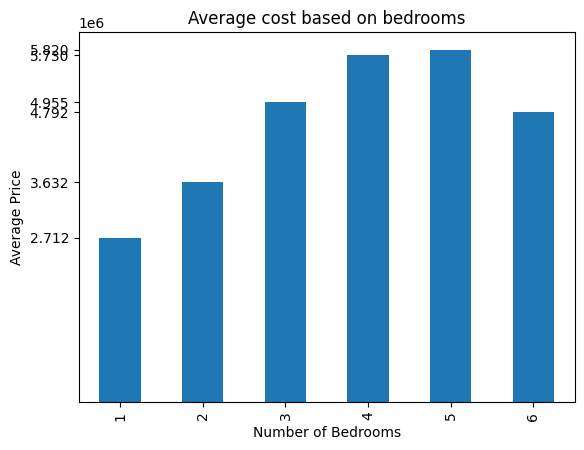

In [27]:
bedroom_means = df.groupby('bedrooms')['price'].mean()
ax = bedroom_means.plot(kind='bar', title='Average cost based on bedrooms')
ax.set_yticks(bedroom_means)

plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')

plt.show()

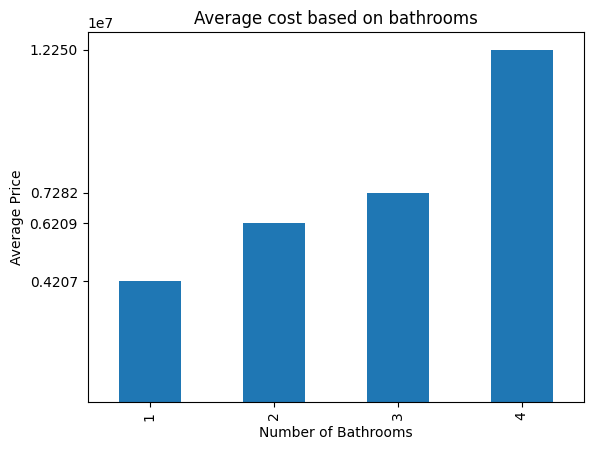

In [40]:


bathroom_means = df.groupby('bathrooms')['price'].mean()
bx = bathroom_means.plot(kind='bar', title='Average cost based on bathrooms')
bx.set_yticks(bathroom_means)

plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')

plt.show()

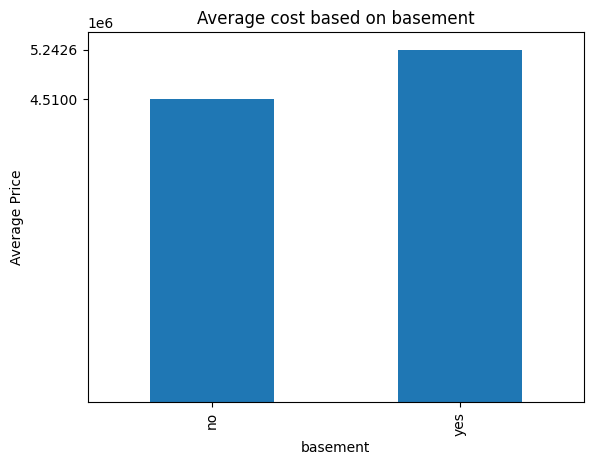

In [41]:
basement_means = df.groupby('basement')['price'].mean()
cx = basement_means.plot(kind='bar', title='Average cost based on basement')
cx.set_yticks(basement_means)

plt.xlabel('basement')
plt.ylabel('Average Price')

plt.show()

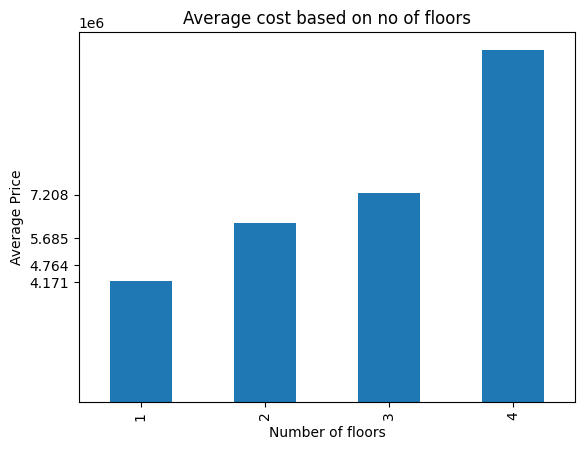

In [42]:
stories_means = df.groupby('stories')['price'].mean()
dx = bedroom_means.plot(kind='bar', title='Average cost based on no of floors')
dx.set_yticks(stories_means)

plt.xlabel('Number of floors')
plt.ylabel('Average Price')

plt.show()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

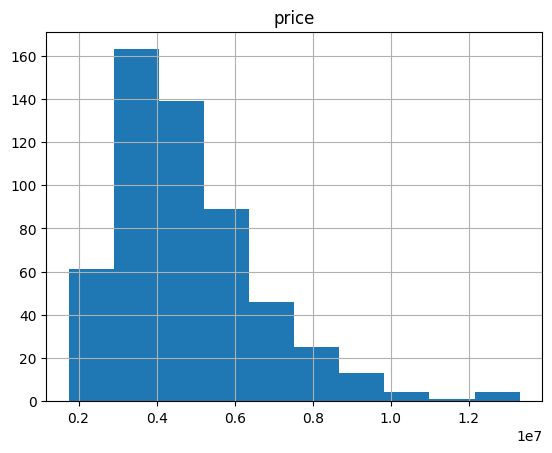

In [44]:
df.hist(column='price')

array([[<Axes: title={'center': 'bedrooms'}>]], dtype=object)

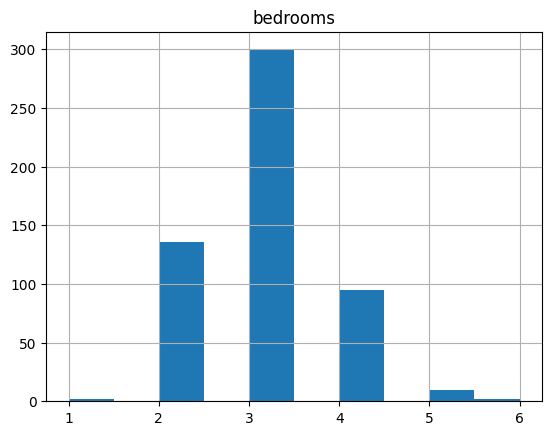

In [47]:
df.hist(column='bedrooms')

array([[<Axes: title={'center': 'area'}>]], dtype=object)

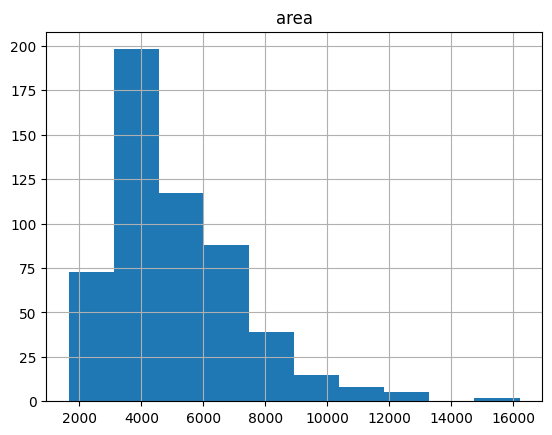

In [48]:
df.hist(column='area')

array([[<Axes: title={'center': 'stories'}>]], dtype=object)

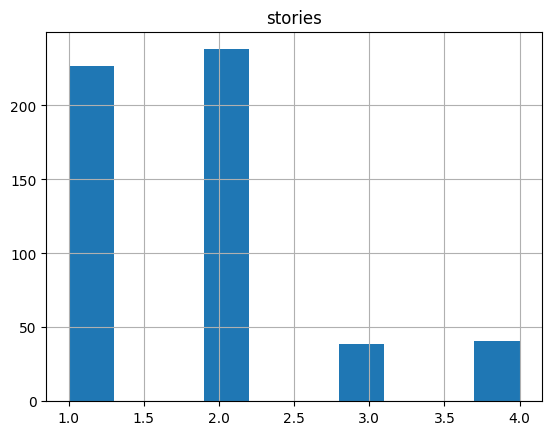

In [49]:
df.hist(column='stories')

<Axes: title={'center': 'no of bedrooms vs no of bathrooms'}, xlabel='bedrooms', ylabel='bathrooms'>

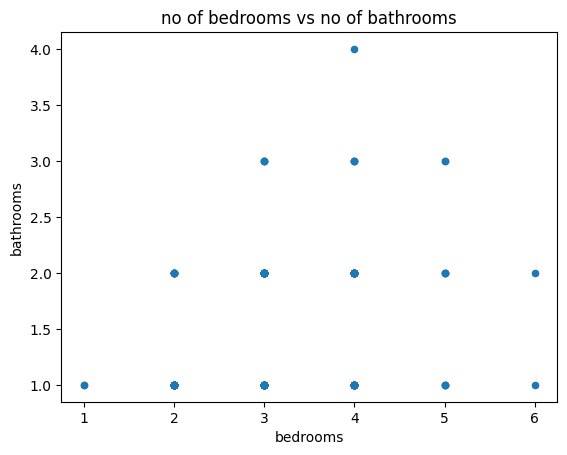

In [45]:
df.plot(x='bedrooms', y='bathrooms', kind='scatter', title='no of bedrooms vs no of bathrooms')

<Axes: title={'center': 'no of bedrooms vs no of stories'}, xlabel='bedrooms', ylabel='stories'>

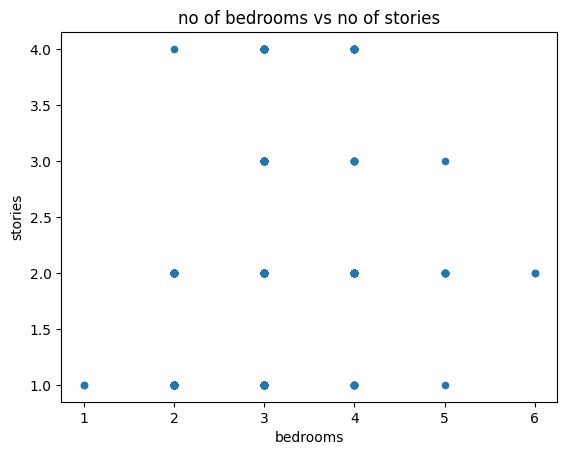

In [46]:
df.plot(x='bedrooms', y='stories', kind='scatter', title='no of bedrooms vs no of stories')

In [50]:
##Machine Learning Algorithms

In [77]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
df.drop(['Id'], axis=1, inplace=True)

In [81]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
##Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [86]:
y_pred=clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

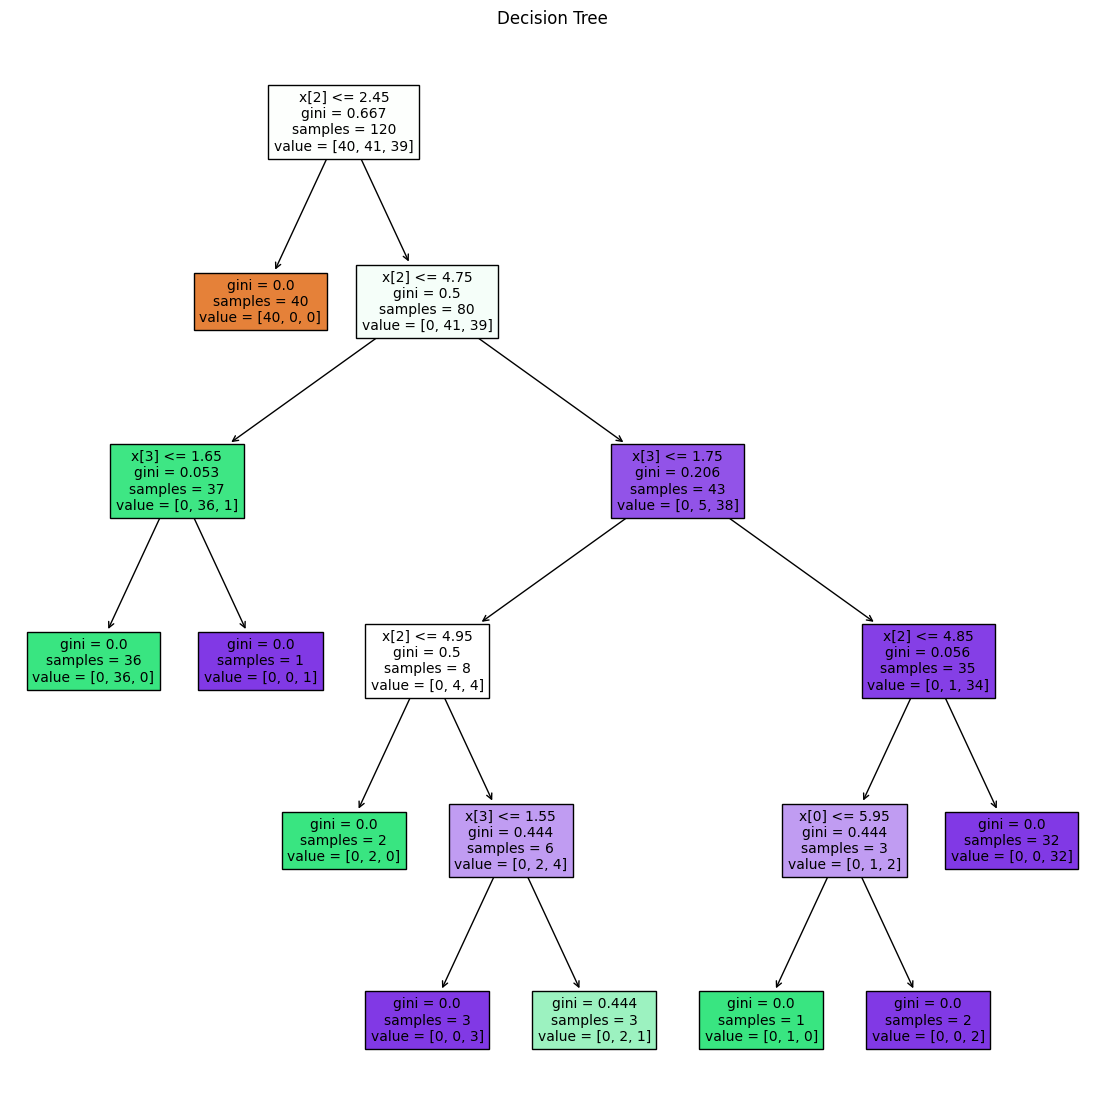

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf, fontsize=10, filled=True)
plt.title("Decision Tree")
plt.show()

In [88]:
print("Accuracy: ", clf.score(X_test,y_test)*100, "%")

Accuracy:  100.0 %


In [92]:
#KNN Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
y_pred = knn.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [96]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [97]:
##Support Vector Machine Classifier

In [98]:
from sklearn.svm import SVC

In [99]:
kernel=['linear', 'rbf', 'poly', 'sigmoid']
for i in kernel:
    model=SVC(kernel=i, C=1.0)
    model.fit(X_train,y_train)
    print('For kernel: ', i)
    print('Accuracy is: ', model.score(X_test,y_test))

For kernel:  linear
Accuracy is:  1.0
For kernel:  rbf
Accuracy is:  1.0
For kernel:  poly
Accuracy is:  1.0
For kernel:  sigmoid
Accuracy is:  0.3


In [100]:
clf=SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [101]:
print("Accuracy is: ", clf.score(X_test, y_test)*100, "%")

Accuracy is:  100.0 %


In [102]:
##Multilayer Perceptron Classifier

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
clf=MLPClassifier(random_state=1, max_iter=300).fit(X_train,y_train)

c:\Users\adina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
y_pred=clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [106]:
print("Accuracy is: ", clf.score(X_test,y_test)*100, "%")

Accuracy is:  100.0 %


In [107]:
##Naive Bayes Classifier

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [110]:
y_pred=nb.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [111]:
print("Accuracy is: ", nb.score(X_test,y_test)*100, "%")

Accuracy is:  100.0 %


In [112]:
##Comparison of the Accuracies of the ML Algorithms

In [113]:
names=['Decision Tree', 'KNN', 'Linear SVM', 'Multilayer Perceptron', 'Naive Bayes']
classifiers=[DecisionTreeClassifier(max_depth=5), KNeighborsClassifier(3), SVC(kernel='linear', C=1.0), MLPClassifier(random_state=1, max_iter=300), GaussianNB()]

In [114]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train.values.ravel())
    score=clf.score(X_test, y_test)
    print("Classifier Name: ", name, "Score: ", score)

Classifier Name:  Decision Tree Score:  1.0
Classifier Name:  KNN Score:  1.0
Classifier Name:  Linear SVM Score:  1.0
Classifier Name:  Multilayer Perceptron Score:  1.0
Classifier Name:  Naive Bayes Score:  1.0


c:\Users\adina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
